# Data wrangling

Data rarely comes in the appropriate format for the analysis.
Ones does need to work with the data first to put it in the right conditions.

* Estimates suggest this task takes 90% of the time of data scientists.
* How to do this (efficiently) depends on the programming language.
  * See bibliography at the end for a guideline to the topic and cheatsheets for `pandas` (Python).
  * Some points are made below and during the workshop. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%run -i settings.py

## Missing data

What to do with gaps?

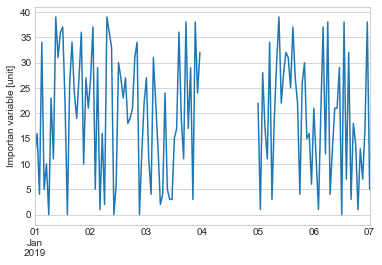

In [2]:
# Make up some data to prove the point
index = pd.date_range('2019-01-01', '2019-01-07', freq='H')
s = pd.Series(data=np.random.randint(0, 40, size=len(index)), 
              index=index)
s.loc['2019-01-04'] = np.nan

# Visualize
fig, ax = plt.subplots()
s.plot()
ax.set_ylabel('Importan variable [unit]')
plt.show()

Some strategies include:

* **Panic:** where you suppose to measure that as part of your experiment?
* **Do nothing:** if it is missing, it is missing.
* **Fill them:** For example,
  - Interpolate (average, max/min, moving averages, fitted polynomial...)
  - Regression.  

## Different frequencies

What happens with data collected at different frequencies?

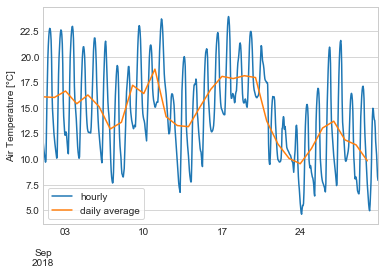

In [3]:
# Get some data
df = pd.read_csv('data/london-2018.csv',
                 index_col=0, parse_dates=True)
# Screw things to prove the point
col  = 'drybulb'
date = '2018-09'
s1   = df.loc[date, col]
s2   = df.loc[date, col].resample('D').mean()

# Visualize
fig, ax = plt.subplots()
s1.plot(ax=ax, label='hourly')
s2.plot(ax=ax, label='daily average')
ax.set_ylabel('Air Temperature [°C]')
plt.legend(frameon=True)
plt.show()

Some strategies include:

* Downsampling (for example, hourly to daily).
* Upsampling (for example, daily to hourly).

But very much depends on the use-case.

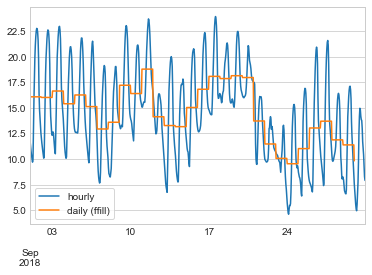

hourly  daily (ffill)
2018-09-01 00:00:00   11.64      16.080833
2018-09-01 01:00:00   11.12      16.080833
2018-09-01 02:00:00   10.68      16.080833
2018-09-01 03:00:00   10.31      16.080833
2018-09-01 04:00:00    9.98      16.080833
...                     ...            ...
2018-09-30 19:00:00   11.06            NaN
2018-09-30 20:00:00   10.40            NaN
2018-09-30 21:00:00    9.30            NaN
2018-09-30 22:00:00    8.27            NaN
2018-09-30 23:00:00    7.91            NaN

[720 rows x 2 columns]

In [4]:
# For example: forward fill values
s3 = s2.resample('H').ffill()
df_ = pd.DataFrame({'hourly': s1, 'daily (ffill)': s3},
                   s1.index)

fig, ax = plt.subplots()
df_.plot(ax=ax)
plt.legend(frameon=True)
plt.show()

df_

# Aligning data

What to do with when data does not match *exaclty*?

In [5]:
# Make up some data to illustrate the point
s1 = s.copy()
s1.index = s1.index + pd.DateOffset(seconds=np.random.rand())
s2 = s.copy()
s2.index = s2.index + pd.DateOffset(seconds=np.random.rand())

In [6]:
df = pd.DataFrame(data=dict(s1=s1, s2=s2))
df

s1    s2
2019-01-01 00:00:00.700544   NaN  12.0
2019-01-01 00:00:00.905369  12.0   NaN
2019-01-01 01:00:00.700544   NaN  16.0
2019-01-01 01:00:00.905369  16.0   NaN
2019-01-01 02:00:00.700544   NaN   4.0
...                          ...   ...
2019-01-06 22:00:00.905369  17.0   NaN
2019-01-06 23:00:00.700544   NaN  38.0
2019-01-06 23:00:00.905369  38.0   NaN
2019-01-07 00:00:00.700544   NaN   5.0
2019-01-07 00:00:00.905369   5.0   NaN

[290 rows x 2 columns]

Compare:

In [7]:
df.resample('H').mean()

s1    s2
2019-01-01 00:00:00  12.0  12.0
2019-01-01 01:00:00  16.0  16.0
2019-01-01 02:00:00   4.0   4.0
2019-01-01 03:00:00  34.0  34.0
2019-01-01 04:00:00   5.0   5.0
...                   ...   ...
2019-01-06 20:00:00  13.0  13.0
2019-01-06 21:00:00   7.0   7.0
2019-01-06 22:00:00  17.0  17.0
2019-01-06 23:00:00  38.0  38.0
2019-01-07 00:00:00   5.0   5.0

[145 rows x 2 columns]

## Bibliography

* On the topic:
  - [Wikipedia](https://en.wikipedia.org/wiki/Data_wrangling)
* Python:
  * [`pandas` cheat sheet ❤](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
  * Jarmul, K., Kazil, J., (2016). Data Wrangling with Python. O'Reilly Media, Inc.